In [1]:
from sb3_contrib import RecurrentPPO

run = '1709152015'

model = RecurrentPPO.load(f"F:/E2E-CARLA-ReinforcementLearning-PPO/logs/{run}/best_model.zip", print_system_info=True)

== CURRENT SYSTEM INFO ==
- OS: Windows-10-10.0.22631-SP0 10.0.22631
- Python: 3.8.18
- Stable-Baselines3: 2.2.1
- PyTorch: 2.1.2+cpu
- GPU Enabled: False
- Numpy: 1.24.4
- Cloudpickle: 3.0.0
- Gymnasium: 0.29.1
- OpenAI Gym: 0.26.2

== SAVED MODEL SYSTEM INFO ==
- OS: Windows-10-10.0.22631-SP0 10.0.22631
- Python: 3.8.18
- Stable-Baselines3: 2.2.1
- PyTorch: 2.1.2+cpu
- GPU Enabled: False
- Numpy: 1.24.4
- Cloudpickle: 3.0.0
- Gymnasium: 0.29.1
- OpenAI Gym: 0.26.2



In [2]:
model.policy

RecurrentActorCriticCnnPolicy(
  (features_extractor): NatureCNN(
    (cnn): Sequential(
      (0): Conv2d(1, 32, kernel_size=(8, 8), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=9216, out_features=512, bias=True)
      (1): ReLU()
    )
  )
  (pi_features_extractor): NatureCNN(
    (cnn): Sequential(
      (0): Conv2d(1, 32, kernel_size=(8, 8), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=9216, out_features=512, bias=True)
      (1): ReLU()
    )
  )
  (vf_features_extractor): NatureCNN(
  

In [1]:
import pandas as pd

In [129]:
files = ['run-PPO_0-tag-cum_reward.csv', 'run-PPO1_0-tag-cum_reward.csv', 'run-PPO2_0-tag-cum_reward.csv', 'run-PPO3_0-tag-cum_reward.csv']

In [130]:
dfs = []
for file in files:
    dfs.append(pd.read_csv(f'logs/1709152015/evaluation/{file}', index_col='Step'))
    

In [131]:
for x in range(1, len(dfs)):
    dfs[x] = dfs[x].loc[dfs[x-1].index[-1]:]


In [132]:
df = pd.concat(dfs)

In [134]:
df

,Wall time,Value
Step,,
19,1.709152e+09,14.370081
43,1.709152e+09,196.357407
46,1.709152e+09,233.256042
72,1.709152e+09,8.285749
95,1.709152e+09,33.561493
...,...,...
48242,1.709219e+09,113.813232
48251,1.709219e+09,192.747757
48265,1.709219e+09,354.632324


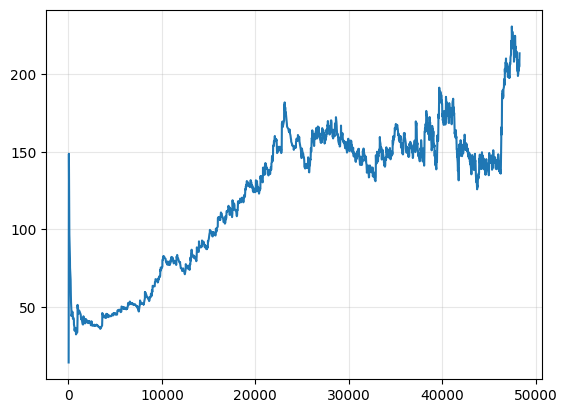

In [136]:
import pandas as pd
import matplotlib.pyplot as plt


smooth = df.ewm(alpha=(1 - 0.99)).mean()


# plt.plot(df["Value"], alpha=0.4)
plt.plot(smooth["Value"])
# plt.ylim(bottom = 0, top=12.5)
plt.grid(alpha=0.3)

plt.show()